<a href="https://colab.research.google.com/github/gabsgt/FIAP-EY-Fase5/blob/main/bank_customer_F5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Objetivo:

Segmentar clientes por clusterização em baixa, média ou alta renda, e após isso classifica-los com novos dados ao entrar na plataforma.
A plataforma irá sugerir os produtos destinados aquela faixa de clientes.

### Importando pacotes

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/FIAP - Atividades/Fase 5/dataset/bank_customer.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Análise exploratória

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48


Deletando as variáveis que não serão importantes para o modelo.

In [ ]:
df.drop(['RowNumber', 'CustomerId', 'Exited'], axis=1, inplace=True)

In [ ]:
df.drop('Surname', axis=1, inplace=True)

In [ ]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [ ]:
df.drop('Geography', axis=1, inplace=True)

In [ ]:
df.drop('Balance', axis=1, inplace=True)

In [ ]:
df.head()

,CreditScore,Gender,Age,Tenure,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,Female,42,2,1,1,1,101348.88
1,608,Female,41,1,1,0,1,112542.58
2,502,Female,42,8,3,1,0,113931.57
3,699,Female,39,1,2,0,0,93826.63
4,850,Female,43,2,1,1,1,79084.10


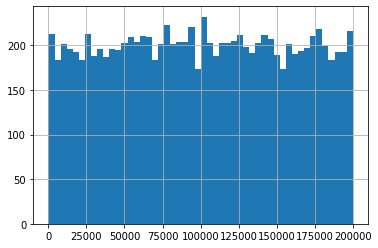

In [ ]:
df['EstimatedSalary'].hist(bins=50)

Como os salários estão bastante equilibrados, vamos usar um algoritmo de clusterização para definir grupos de clientes.

### Feature Engineering

In [ ]:
df['Gender'] = df['Gender'].replace('Female', 0)
df['Gender'] = df['Gender'].replace('Male', 1)

In [ ]:
df['Gender'].unique()

array([0, 1])

In [ ]:
df.head()

,CreditScore,Gender,Age,Tenure,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,42,2,1,1,1,101348.88
1,608,0,41,1,1,0,1,112542.58
2,502,0,42,8,3,1,0,113931.57
3,699,0,39,1,2,0,0,93826.63
4,850,0,43,2,1,1,1,79084.10


### Model

Método cotovelo

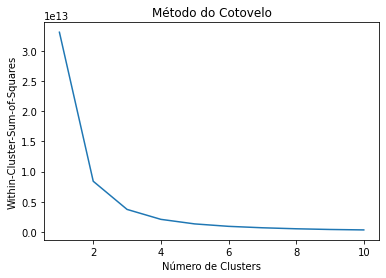

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title("Método do Cotovelo")
plt.xlabel("Número de Clusters")
plt.ylabel("Within-Cluster-Sum-of-Squares")
plt.show()

Como desejado, o método cotovelo nos mostrou que o número de clusters ideal é 3.

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10)
clusters = kmeans.fit_predict(df)
clusters

array([1, 1, 1, ..., 0, 1, 0], dtype=int32)

In [ ]:
df['Cluster'] = clusters

In [ ]:
df = pd.DataFrame(df)

In [ ]:
cluster_zero = df['Cluster'] == 0
df[cluster_zero]

,CreditScore,Gender,Age,Tenure,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Cluster
6,822,1,50,7,2,1,1,10062.80,0
12,476,0,34,10,2,1,0,26260.98,0
14,635,0,35,7,2,1,1,65951.65,0
15,616,1,45,3,2,0,1,64327.26,0
16,653,1,58,1,1,1,0,5097.67,0
...,...,...,...,...,...,...,...,...,...
9988,775,1,30,4,2,1,0,49337.84,0
9990,714,1,33,3,1,1,0,53667.08,0
9993,644,1,28,7,1,1,0,29179.52,0
9997,709,0,36,7,1,0,1,42085.58,0


In [ ]:
cluster_one = df['Cluster'] == 1
df[cluster_one]

,CreditScore,Gender,Age,Tenure,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Cluster
0,619,0,42,2,1,1,1,101348.88,1
1,608,0,41,1,1,0,1,112542.58,1
2,502,0,42,8,3,1,0,113931.57,1
3,699,0,39,1,2,0,0,93826.63,1
4,850,0,43,2,1,1,1,79084.10,1
...,...,...,...,...,...,...,...,...,...
9985,659,1,36,6,2,1,0,96833.00,1
9991,597,0,53,4,1,1,0,69384.71,1
9995,771,1,39,5,2,1,0,96270.64,1
9996,516,1,35,10,1,1,1,101699.77,1


In [ ]:
cluster_two = df['Cluster'] == 2
df[cluster_two]

,CreditScore,Gender,Age,Tenure,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Cluster
5,645,1,44,8,2,1,0,149756.71,2
13,549,0,25,5,2,0,0,190857.79,2
18,587,1,45,6,1,0,0,158684.81,2
20,732,1,41,8,2,1,1,170886.17,2
21,636,0,32,8,2,1,0,138555.46,2
...,...,...,...,...,...,...,...,...,...
9978,774,1,40,9,2,1,0,191608.97,2
9983,613,1,40,4,1,0,0,151325.24,2
9989,841,1,28,4,2,1,1,179436.60,2
9992,726,1,36,2,1,1,0,195192.40,2


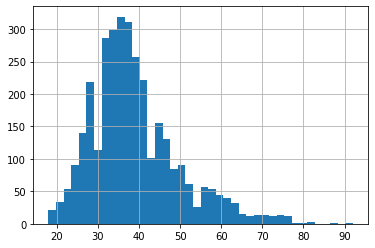

In [ ]:
df[cluster_zero]['Age'].hist(bins=40)

In [ ]:
df[cluster_zero]['Age'].hist(bins=40)

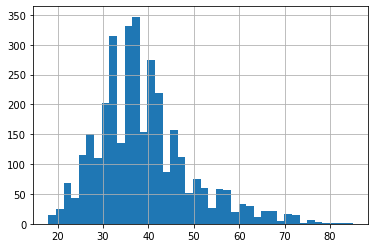

In [ ]:
df[cluster_one]['Age'].hist(bins=40)

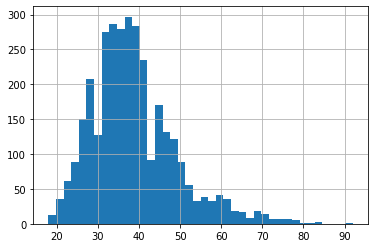

In [ ]:
df[cluster_two]['Age'].hist(bins=40)